<a href="https://colab.research.google.com/github/DinhHuySang/Traffic-sign-classification/blob/master/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đoạn này import thư viện này


In [1]:
import tensorflow as tf
tf.__version__
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer

# Đoạn này để copy những gì làm được lưu lên gg drive thôi. Hiểu thêm thì đọc ở đây https://colab.research.google.com/drive/1byaraKwlMWVWkP1EARLgxBDF_4QoQu7Z


In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd /content/drive/Shared drives/Drive của Sáng/Traffic_sign_classification

/content/drive/Shared drives/Drive của Sáng/Traffic_sign_classification


In [29]:
ls


 classification_model.ipynb   test.p                        train.p
 ngocnet.h5                  'traffic-signs-data (1).zip'   valid.p
 README.md                   'traffic-signs-data (2).zip'
 sanghandsome.h5              traffic-signs-data.zip


In [30]:
link_data_set = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"


In [31]:
# thư viện wget để download data ve
!pip install wget

In [32]:
import wget

In [33]:
wget.download(link_data_set)

'traffic-signs-data (3).zip'

In [34]:
# ./ là lưu data ở thư mục mình đang làm chứ không phải ở thư mục khác
data = "./"

In [ ]:
pwd # xem duongwfd dẫn

In [36]:
!unzip -q traffic-signs-data.zip -d $data # lệnh giải nén file zip


replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [37]:
# nối đường dẫn
train_link = data+"train.p"
valid_link = data+"valid.p"
test_link  = data+"test.p"


In [38]:
#data không phải format excel hay csv nên mình sử dụng thư viện pickle để đọc data
# đọc xong thì data nó ở dạng vector
# mình có 3 tập train, valid, test
import pickle

In [39]:
with open(train_link, mode="rb") as tr:
  train = pickle.load(tr) 

In [74]:
with open(valid_link, mode="rb") as va:
  valid = pickle.load(va)

In [75]:
with open(test_link, mode="rb") as te:
  test = pickle.load(te)

In [76]:
trainX = train["features"]
trainy = train["labels"]

In [77]:
print(trainX.shape)
print(trainy.shape)

(34799, 32, 32, 3)
(34799,)


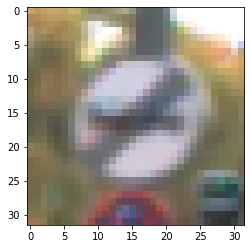

In [78]:
# chỗ này mình in thử xem như nào thôi, mọi người có thể chọn cách visualization xịn xò hơn
plt.imshow(trainX[100])

In [79]:
trainy[100]

41

In [80]:
# Ta có 43 class tương ứng 43 loại biển phân loại
# define 43 loại biển báo này bằng các số  
classNames = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
    }


In [81]:
# chỗ này test thử xem có đúng là biển báo đấy không
classNames[trainy[100]]

'End of no passing'

In [82]:
# xáo trộn data lên (cái này thử chơi thôi thực ra không cần)
trainX, trainy = shuffle(trainX,trainy)

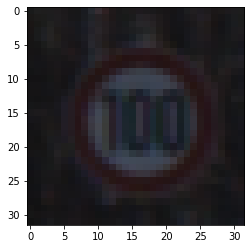

In [83]:
plt.imshow(trainX[100])

In [84]:
classNames[trainy[100]]

'Speed limit (100km/h)'

In [85]:
validX = valid["features"]
validy = valid["labels"]

In [86]:
testX = test["features"]
testy = test["labels"]

In [87]:
print(validX.shape)
print(validy.shape)

(4410, 32, 32, 3)
(4410,)


In [88]:
print(testX.shape)
print(testy.shape)

(12630, 32, 32, 3)
(12630,)


In [89]:
# từ bước này mới quan trọng
#ta đưa nó về  0-1 cho dễ tính. thay vì các số mấy trăm, mấy ngàn tính khó
trainX = trainX.astype("float")/255.0
validX = validX.astype("float")/255.0
testX = testX.astype("float")/255.0

# đưa về one-hot


In [90]:

lb = LabelBinarizer()

In [91]:
trainy = lb.fit_transform(trainy)

In [92]:
validy = lb.fit_transform(validy)

In [93]:
valid["labels"][100]

31

In [94]:
valid["labels"][50]

31

In [95]:
validy[100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Training model


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import  SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [97]:
width = 32
height = 32
classes = 43

In [65]:
model = Sequential()
shape = (width,height,3)
model.add(Conv2D(32,(3,3), padding="same", input_shape=shape))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2), padding='same'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64,(2,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(classes))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1

In [98]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15,width_shift_range=0.2, height_shift_range=0.2)

In [100]:
epochs = 5
batch_size = 64

In [102]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [103]:
print("start trainning")

start trainning


In [104]:
H = model.fit_generator(aug.flow(trainX,trainy,batch_size=batch_size), validation_data=(validX,validy),steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs,verbose=1)

Epoch 1/5
543/543 [==============================] - 25s 45ms/step - loss: 0.9867 - accuracy: 0.7070 - val_loss: 0.4063 - val_accuracy: 0.8864
Epoch 2/5
543/543 [==============================] - 24s 44ms/step - loss: 0.1455 - accuracy: 0.9601 - val_loss: 0.5672 - val_accuracy: 0.8488
Epoch 3/5
543/543 [==============================] - 24s 44ms/step - loss: 0.0721 - accuracy: 0.9798 - val_loss: 0.3392 - val_accuracy: 0.9029
Epoch 4/5
543/543 [==============================] - 24s 44ms/step - loss: 0.0571 - accuracy: 0.9837 - val_loss: 0.1681 - val_accuracy: 0.9594
Epoch 5/5
543/543 [==============================] - 24s 43ms/step - loss: 0.0453 - accuracy: 0.9878 - val_loss: 0.1281 - val_accuracy: 0.9714


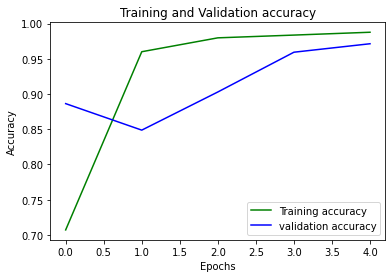

In [105]:
loss_train = H.history['accuracy']
loss_val = H.history['val_accuracy']
epochs = range(5)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

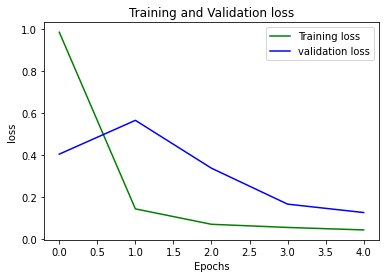

In [106]:
loss_tra = H.history['loss']
loss_va = H.history['val_loss']
epochs = range(5)
plt.plot(epochs, loss_tra, 'g', label='Training loss')
plt.plot(epochs, loss_va, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [107]:
model.save("sanghandsome.h5")# cái này để luu model để dùng, không phải train lại nữa

In [108]:
save_model = tf.keras.models.load_model("sanghandsome.h5")

In [109]:
result = save_model.predict(testX)

In [110]:
result.shape

(12630, 43)

In [111]:
final = np.argmax(result, axis=1)

In [112]:
final.shape

(12630,)

In [113]:
 from sklearn.metrics import accuracy_score

In [114]:
accuracy_score(testy,final)

0.9409342834520982